In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
import codecs

In [2]:
with open('pokedex.json', encoding='latin1') as file:
    pokedex = json.load(file)
with open('moves.json') as file:
    moves = json.load(file)
with open('learnsets.json') as file:
    learnsets = json.load(file)

In [3]:
len(pokedex)
print(list(pokedex.keys())[:20])

['bulbasaur', 'ivysaur', 'venusaur', 'venusaurmega', 'venusaurgmax', 'charmander', 'charmeleon', 'charizard', 'charizardmegax', 'charizardmegay', 'charizardgmax', 'squirtle', 'wartortle', 'blastoise', 'blastoisemega', 'blastoisegmax', 'caterpie', 'metapod', 'butterfree', 'butterfreegmax']


In [4]:
dexit = [p for p in pokedex if "isNonstandard" not in pokedex[p]]
print(len(dexit))
exclude = [p for p in dexit if "tier" not in pokedex[p]]
print(len(exclude))

valid_pokemon = [p for p in dexit if "tier" in pokedex[p]]

770
14


In [5]:
joined = [p for p in valid_pokemon if p in learnsets]
missing = [p for p in valid_pokemon if p not in learnsets]
print(len(missing))
print(missing)

24
['basculinbluestriped', 'pumpkaboosmall', 'pumpkaboolarge', 'gourgeistsmall', 'gourgeistlarge', 'gourgeistsuper', 'zygardecomplete', 'silvallybug', 'silvallydark', 'silvallydragon', 'silvallyelectric', 'silvallyfairy', 'silvallyfighting', 'silvallyfire', 'silvallyflying', 'silvallyghost', 'silvallygrass', 'silvallyground', 'silvallyice', 'silvallypoison', 'silvallypsychic', 'silvallyrock', 'silvallysteel', 'silvallywater']


In [6]:
def match_till(s1,s2):
    for i in range(min(len(s1),len(s2))):
        if s1[i] != s2[i]:
            return i
    return i
for p in missing:
    print(p,'\t',sorted(joined, key=lambda x: -match_till(p,x))[:3])

basculinbluestriped 	 ['basculin', 'barboach', 'baltoy']
pumpkaboosmall 	 ['pumpkaboosuper', 'pumpkaboo', 'pupitar']
pumpkaboolarge 	 ['pumpkaboosuper', 'pumpkaboo', 'pupitar']
gourgeistsmall 	 ['gourgeist', 'golbat', 'golduck']
gourgeistlarge 	 ['gourgeist', 'golbat', 'golduck']
gourgeistsuper 	 ['gourgeist', 'golbat', 'golduck']
zygardecomplete 	 ['zygarde10', 'zygarde', 'zubat']
silvallybug 	 ['silvally', 'silicobra', 'sigilyph']
silvallydark 	 ['silvally', 'silicobra', 'sigilyph']
silvallydragon 	 ['silvally', 'silicobra', 'sigilyph']
silvallyelectric 	 ['silvally', 'silicobra', 'sigilyph']
silvallyfairy 	 ['silvally', 'silicobra', 'sigilyph']
silvallyfighting 	 ['silvally', 'silicobra', 'sigilyph']
silvallyfire 	 ['silvally', 'silicobra', 'sigilyph']
silvallyflying 	 ['silvally', 'silicobra', 'sigilyph']
silvallyghost 	 ['silvally', 'silicobra', 'sigilyph']
silvallygrass 	 ['silvally', 'silicobra', 'sigilyph']
silvallyground 	 ['silvally', 'silicobra', 'sigilyph']
silvallyice 	 ['

In [7]:
join_dict = {p:p for p in joined}
join_dict['pumpkaboosmall'] = 'pumpkaboo'
join_dict['pumpkaboolarge'] = 'pumpkaboo'
join_dict['gourgeistsmall'] = 'gourgeist'
join_dict['gourgeistlarge'] = 'gourgeist'
join_dict['gourgeistsuper'] = 'gourgeist'
join_dict['zygardecomplete'] = 'zygarde'
# we will need to handle silvally, arceus, and genesect separately
join_dict.pop('genesectdouse')
join_dict.pop('genesectshock')
join_dict.pop('genesectburn')
join_dict.pop('genesectchill')



'genesectchill'

In [14]:
learnsets['giratinaorigin'] = learnsets['giratina']
learnsets['tornadustherian'] = learnsets['tornadus']
learnsets['thundurustherian'] = learnsets['thundurus']
learnsets['landorustherian'] = learnsets['landorus']

In [15]:
print(len(moves))
movelist = list({ move for p in join_dict.values() for move, gens in learnsets[p]['learnset'].items() if sum(g[0] == '8' for g in gens) > 0 })
print(len(movelist))

859
666


In [9]:
print([p for p in join_dict if 'learnset' not in learnsets[join_dict[p]]])

['giratinaorigin', 'tornadustherian', 'thundurustherian', 'landorustherian']


In [16]:
tokens = { t for p in join_dict for move in learnsets[join_dict[p]]['learnset'] for t in learnsets[join_dict[p]]['learnset'][move]}
print(tokens)

{'6L37', '4S20', '7L70', '6L32', '4L85', '7L17', '4L67', '7S46', '4L57', '6L5', '4S9', '7L6', '4L2', '3L16', '5L66', '8L27', '3L13', '6L14', '4L30', '6S3', '5L2', '7L16', '5L74', '6L43', '4L36', '6L89', '8L50', '7L36', '5L1', '8L59', '5L35', '7L41', '4L23', '8L68', '6L50', '6L55', '4T', '4M', '3L43', '4L50', '7T', '4L91', '7L72', '7S48', '8S11', '3L25', '3L7', '3S7', '8T', '6L29', '6L86', '7L77', '3L5', '8L98', '3L41', '7L47', '7L67', '3L53', '6L77', '4L47', '8L63', '3L67', '7L97', '5L26', '5S2', '7L12', '7L65', '3L32', '8L84', '4L34', '7L2', '8S7', '6L90', '5S13', '6S7', '8L54', '6S2', '7L79', '7S45', '4L49', '8L21', '7L91', '7L49', '6L92', '7E', '4L62', '5L47', '5S25', '5L10', '8L20', '3L62', '6L62', '4L19', '3L29', '7S24', '3L21', '6L9', '8L39', '5L63', '8L5', '6L25', '8S1', '4L51', '5R', '5L96', '4L33', '7S49', '8L25', '3S2', '4L45', '4L31', '6S0', '3L49', '3S12', '7L44', '3L38', '3L23', '6L73', '4L1', '4L66', '6S19', '5T', '8L35', '8S6', '5L92', '5L28', '6S8', '8V', '7L62', '6S40'

In [20]:
pokelist = list(join_dict.keys())
abilities = list({ a for p in pokelist for a in pokedex[p]['abilities'].values()})

In [21]:
# Construct the pokemon x attributes matrix
rows = len(join_dict)
# Attributes: 17-bitvector of typing
# 1 bitvector of "has evolution"
# 6 vector of stats
# 243 bitvector of abilities
# 859 bitvector of moves

cols = 18 + 1 + 6 + len(abilities) + len(movelist)
print(rows*cols)
pokemat = np.zeros((rows,cols))

685556


In [22]:
ptypes = sorted("Normal Fighting Flying Poison Ground Rock Bug Ghost Steel Fire Water Grass Electric Psychic Ice Dragon Dark Fairy".split())

In [23]:
for i,p in enumerate(join_dict):
    for t in pokedex[p]['types']:
        pokemat[i,ptypes.index(t)] = 1
    if 'evos' in pokedex[p]:
        pokemat[i,18] = 1
    pokemat[i,19] = pokedex[p]['baseStats']['hp']
    pokemat[i,20] = pokedex[p]['baseStats']['atk']
    pokemat[i,21] = pokedex[p]['baseStats']['def']
    pokemat[i,22] = pokedex[p]['baseStats']['spa']
    pokemat[i,23] = pokedex[p]['baseStats']['spd']
    pokemat[i,24] = pokedex[p]['baseStats']['spe']
    for a in pokedex[p]['abilities'].values():
        pokemat[i,25+abilities.index(a)] = 1
    for m in learnsets[join_dict[p]]['learnset']:
        if max([ s[0] == '8' for s in learnsets[join_dict[p]]['learnset'][m]]) > 0:
            pokemat[i,25+len(abilities)+movelist.index(m)] = 1

In [24]:

# set silvally to be 1/17 each type
pokemat[pokelist.index('silvally'),:18] = 1/18

print(len(abilities))
print(abilities)

243
['Rattled', 'Refrigerate', 'Ice Scales', 'Trace', 'Psychic Surge', 'Soundproof', 'Water Veil', 'Wandering Spirit', 'Flare Boost', 'Run Away', 'Triage', 'Stance Change', 'Solid Rock', 'Snow Cloak', 'Blaze', 'Inner Focus', 'Motor Drive', 'Poison Touch', 'Unburden', 'Telepathy', 'Neutralizing Gas', 'Forewarn', 'Sap Sipper', 'Power Spot', 'Unaware', 'Stench', 'Early Bird', 'Fur Coat', 'Liquid Ooze', 'Flower Gift', 'Quick Feet', 'Liquid Voice', 'Shield Dust', 'Steadfast', 'Regenerator', 'Emergency Exit', 'Stakeout', 'Flower Veil', 'Damp', 'Stalwart', 'No Guard', 'Gale Wings', 'Sand Veil', 'Cursed Body', 'Magician', 'Aura Break', 'Arena Trap', 'Harvest', 'Berserk', 'Perish Body', 'Electric Surge', 'Receiver', 'Vital Spirit', 'Unnerve', 'Frisk', 'Fairy Aura', 'Water Bubble', 'Leaf Guard', "Dragon's Maw", 'Fluffy', 'Weak Armor', 'Surge Surfer', 'Marvel Scale', 'Innards Out', 'White Smoke', 'Hustle', 'Schooling', 'Sand Force', 'Poison Point', 'Strong Jaw', 'Sniper', 'Cute Charm', 'Pressure'

In [25]:
# Optional: normalize columns
print(pokemat.shape)
print(len(abilities))
print(len(movelist))



(734, 934)
243
666


In [26]:
# Analysis 1: Do PCA on this dataset
pokemean = np.mean(pokemat, axis=0)
pokemat_c = pokemat - pokemean
stds = [np.std(pokemat_c[:,:18])] \
    + [np.std(pokemat_c[:,i]) for i in range(18,25)] \
    + [np.std(pokemat_c[:,25:25+len(abilities)]), np.std(pokemat_c[:,25+len(abilities):25+len(abilities)+len(movelist)])]
pokevar = np.zeros(pokemat.shape[1])
pokevar[:18] = stds[0]
pokevar[18:25] = stds[1:8]
pokevar[25:25+len(abilities)] = stds[-2]
pokevar[25+len(abilities):25+len(abilities)+len(movelist)] = stds[-1]

pokemat_pca = (pokemat_c / pokevar)
u,s,vt = np.linalg.svd(pokemat_pca, full_matrices=False)

In [27]:
print(np.std(pokemat_pca[:,0]))
print(np.std(pokemat_pca[:,10]))
print(np.std(pokemat_pca[:,20]))
print(np.std(pokemat_pca[:,30]))
print(pokevar[15:25])
print(pokevar[-5:])
print(stds)

0.8939780715775708
1.0104316941151243
1.0
1.2443933496467452
[ 0.27918997  0.27918997  0.27918997  0.49327268 28.1803832  30.68745214
 30.75415246 30.84858524 27.6720784  29.32135864]
[0.2345186 0.2345186 0.2345186 0.2345186 0.2345186]
[0.2791899701791386, 0.49327268305330835, 28.180383204981606, 30.68745214465903, 30.75415245854475, 30.84858524287952, 27.672078401116096, 29.321358639702883, 0.09763639817751961, 0.23451859971328703]


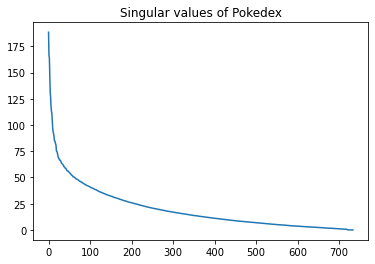

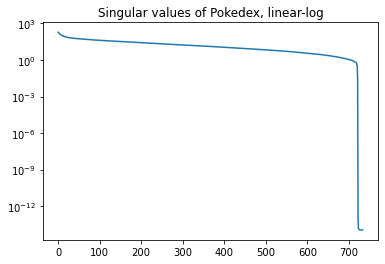

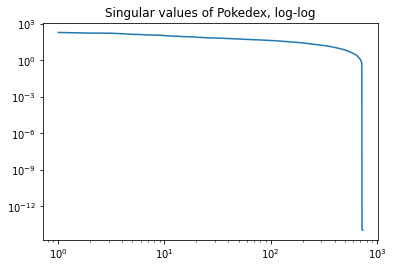

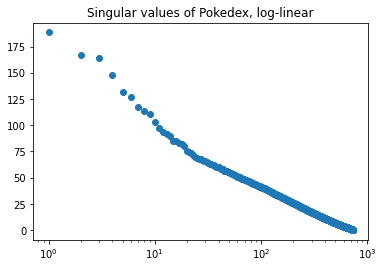

In [28]:
plt.plot(s)
plt.title('Singular values of Pokedex')
plt.show()

plt.plot(s)
plt.title('Singular values of Pokedex, linear-log')
plt.yscale('log')
plt.show()

plt.plot(range(1,len(s)+1), s)
plt.title('Singular values of Pokedex, log-log')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.scatter(range(1,len(s)+1), s)
plt.title('Singular values of Pokedex, log-linear')
plt.xscale('log')
plt.show()

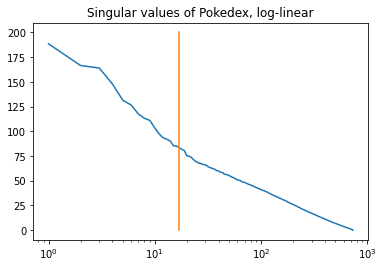

In [29]:
plt.plot(range(1,len(s)+1), s)
plt.plot([17,17],[0,200])
plt.title('Singular values of Pokedex, log-linear')
plt.xscale('log')
plt.show()

In [30]:
def poke_decode(l):
    print('Types')
    tlist = sorted(enumerate(ptypes), key=lambda x: l[x[0]])
    for i,t in tlist[:3]:
        print('\t',t,': ',l[i])
    print('\t...')
    for i,t in tlist[-3:]:
        print('\t',t,': ',l[i])
    print('Evo: ', l[18])
    print('Stats')
    print('\tHP:  ', l[19])
    print('\tAtk: ', l[20])
    print('\tDef: ', l[21])
    print('\tSpA: ', l[22])
    print('\tSpD: ', l[23])
    print('\tSpe: ', l[24])
    print('Abilities')
    alist = sorted(enumerate(abilities), key=lambda x: l[25+x[0]])
    for i,a in alist[:5]:
        print('\t',a,': ',l[25+i])
    print('\t...')
    for i,a in alist[-5:]:
        print('\t',a,': ',l[25+i])
    print('Moves')
    mlist = sorted(enumerate(movelist), key=lambda x: l[25+len(abilities) + x[0]])
    for i,m in mlist[:5]:
        print('\t',m,': ',l[25+len(abilities)+i])
    print('\t...')
    for i,m in mlist[-5:]:
        print('\t',m,': ',l[25+len(abilities)+i])
        

In [31]:
poke_decode(pokemean)

Types
	 Bug :  0.06683318195579777
	 Fire :  0.06819557977596125
	 Ice :  0.06819557977596125
	...
	 Grass :  0.10361792310021194
	 Psychic :  0.12132909476233728
	 Water :  0.151301846805934
Evo:  0.41825613079019075
Stats
	HP:   70.53950953678473
	Atk:  78.54087193460491
	Def:  75.2574931880109
	SpA:  71.77929155313352
	SpD:  72.6008174386921
	Spe:  67.36784741144415
Abilities
	 Triage :  0.0013623978201634877
	 Stance Change :  0.0013623978201634877
	 Power Spot :  0.0013623978201634877
	 Fur Coat :  0.0013623978201634877
	 Flower Gift :  0.0013623978201634877
	...
	 Pressure :  0.035422343324250684
	 Sturdy :  0.03814713896457766
	 Levitate :  0.04087193460490463
	 Inner Focus :  0.043596730245231606
	 Swift Swim :  0.04632152588555858
Moves
	 mirrormove :  0.0013623978201634877
	 gravapple :  0.0013623978201634877
	 anchorshot :  0.0013623978201634877
	 glaciallance :  0.0013623978201634877
	 surgingstrikes :  0.0013623978201634877
	...
	 endure :  0.9686648501362398
	 protect :  

In [32]:
print(u.shape)
print(vt.shape)

(734, 734)
(734, 934)


In [33]:
pokemean[:18]

array([0.06683318, 0.06955798, 0.08454435, 0.08181956, 0.07364517,
       0.06955798, 0.06819558, 0.09953073, 0.07909476, 0.10361792,
       0.08726915, 0.06819558, 0.08863155, 0.07500757, 0.12132909,
       0.07636997, 0.08045716, 0.15130185])

In [34]:
appx = (u[:,[0]] *s[0]) @ vt[[0]]
1-np.linalg.norm(appx-pokemat_pca)**2 / np.linalg.norm(pokemat_pca)**2
1-np.linalg.norm(appx*pokevar-pokemat_c)**2 / np.linalg.norm(pokemat_c)**2

0.05813245908162035

In [35]:
for i in range(10):
    print('% Variance: ', 100 * s[i]**2 / np.square(s).sum())
    poke_decode(vt[i]*pokevar*np.sqrt(s[i]) )
    print('\n------\n')

% Variance:  5.181875027842895
Types
	 Water :  -0.18987909173826467
	 Ground :  -0.18891000826741464
	 Rock :  -0.16620060904174003
	...
	 Grass :  0.14357983038792876
	 Fairy :  0.16249899005605417
	 Psychic :  0.3538088234870622
Evo:  0.03327133512319454
Stats
	HP:   -7.860016871684927
	Atk:  -24.124319567440622
	Def:  -13.478931636881594
	SpA:  16.334830908786284
	SpD:  8.36131608810243
	Spe:  5.252660680431014
Abilities
	 Swift Swim :  -0.08272842813575056
	 Sturdy :  -0.07100085783865918
	 Rock Head :  -0.06800919506498918
	 Sheer Force :  -0.05859875911950866
	 Intimidate :  -0.04534569733171546
	...
	 Magic Guard :  0.05025637157900067
	 Levitate :  0.05894101037155499
	 Telepathy :  0.0686522447221931
	 Frisk :  0.07483617882401229
	 Synchronize :  0.0881479548672061
Moves
	 rocktomb :  -0.5612729306056321
	 rockslide :  -0.5170019344228369
	 bulldoze :  -0.4902144155841736
	 earthquake :  -0.4835827373109228
	 stoneedge :  -0.42121291577280423
	...
	 calmmind :  0.44116699071

	 thief :  -0.46164480813621167
	 fireblast :  -0.3663992949109479
	 flamethrower :  -0.3621875139847378
	 willowisp :  -0.35756228000393986
	 darkpulse :  -0.34796733713718436
	...
	 swordsdance :  0.2695533308532844
	 swift :  0.2774548549731558
	 closecombat :  0.2965314285048395
	 hyperbeam :  0.34509784532761956
	 gigaimpact :  0.39207854637076

------

% Variance:  1.796720881793038
Types
	 Grass :  -0.24726192872843086
	 Electric :  -0.22725893877526143
	 Poison :  -0.16277512578684128
	...
	 Psychic :  0.10791363872343174
	 Fighting :  0.13225999052580484
	 Fire :  0.2808432284929604
Evo:  0.4145517070713014
Stats
	HP:   -7.254697959150636
	Atk:  -16.523698144999546
	Def:  -16.890061544389834
	SpA:  -20.372821955347842
	SpD:  -10.764547905309545
	Spe:  -13.529214483496556
Abilities
	 Chlorophyll :  -0.08758648657284113
	 Static :  -0.08135142267484544
	 Lightning Rod :  -0.07661946482026144
	 Frisk :  -0.06255413174906087
	 Pickup :  -0.053904361034484184
	...
	 Steadfast :  0.

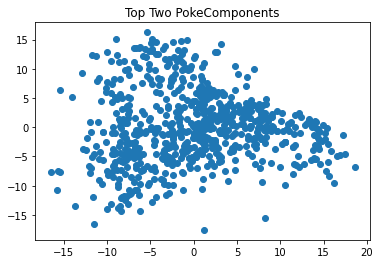

In [36]:
lowdim = u[:,:2] * s[:2]
plt.scatter(*lowdim.T)
plt.title('Top Two PokeComponents')
plt.show()

In [37]:
ptcolors = {'Bug':'greenyellow',
 'Dark': 'black',
 'Dragon': 'blueviolet',
 'Electric': 'yellow',
 'Fairy': 'fuchsia',
 'Fighting': 'darkred',
 'Fire': 'orangered',
 'Flying': 'turquoise',
 'Ghost': 'dimgrey',
 'Grass': 'green',
 'Ground': 'goldenrod',
 'Ice': 'lightblue',
 'Normal': 'lightgrey',
 'Poison': 'darkmagenta',
 'Psychic': 'lightpink',
 'Rock': 'sienna', 
 'Steel': 'steelblue',
 'Water': 'darkblue'}

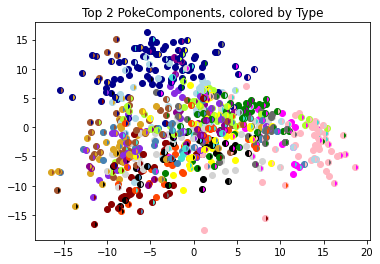

In [38]:
for i,p in enumerate(join_dict):
    if len(pokedex[p]['types']) == 1:
        plt.scatter(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]])
    else:
        plt.plot(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]],linestyle='', marker='o', fillstyle='left',  markerfacecoloralt=ptcolors[pokedex[p]['types'][1]])
plt.title('Top 2 PokeComponents, colored by Type')
plt.show()

In [39]:
selection = np.random.choice(len(join_dict),50,replace=False)

In [40]:
print(len(join_dict))
print(len(pokelist))

734
734


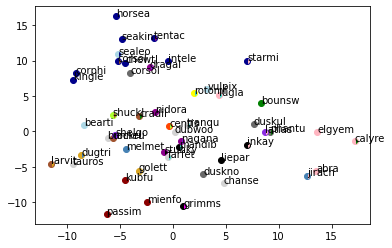

In [41]:
for i in selection:
    p = pokelist[i]
    if len(pokedex[p]['types']) == 1:
        plt.scatter(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]])
    else:
        plt.plot(*lowdim[i], c=ptcolors[pokedex[p]['types'][0]],linestyle='', fillstyle='left',
                 marker='o', markerfacecoloralt=ptcolors[pokedex[p]['types'][1]])
    plt.annotate(p[:6],lowdim[i])
plt.show()

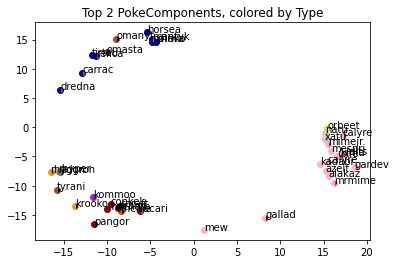

In [42]:
selection = np.argsort(-np.linalg.norm(lowdim,axis=1))[:40]
for i in selection:
    p = pokelist[i]
    if len(pokedex[p]['types']) == 1:
        plt.scatter(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]])
    else:
        plt.plot(*lowdim[i], c=ptcolors[pokedex[p]['types'][0]],linestyle='', fillstyle='left',
                 marker='o', markerfacecoloralt=ptcolors[pokedex[p]['types'][1]])
    plt.annotate(p[:6],lowdim[i])
plt.title('Top 2 PokeComponents, colored by Type')
plt.show()


In [43]:
len(ptypes)

18

In [44]:
# Method 2: KMeans Clustering
from sklearn.cluster import KMeans

In [45]:
km = KMeans(10)
km.fit(pokemat_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
for i,c in enumerate(km.cluster_centers_):
    print('Cluster size: ', sum(km.labels_ == i))
    poke_decode(c*pokevar + pokemean)
    print('-----')

Cluster size:  144
Types
	 Rock :  0.00038580246913574867
	 Fire :  0.007330246913580189
	 Ground :  0.021219135802468925
	...
	 Bug :  0.1531635802469138
	 Normal :  0.19483024691358056
	 Flying :  0.2503858024691356
Evo:  0.5416666666666667
Stats
	HP:   64.09027777777777
	Atk:  70.94444444444446
	Def:  69.60416666666666
	SpA:  61.88888888888889
	SpD:  67.5486111111111
	Spe:  70.79166666666667
Abilities
	 Rock Head :  -5.898059818321144e-17
	 Sand Force :  -4.85722573273506e-17
	 Water Absorb :  -4.163336342344337e-17
	 Mold Breaker :  -3.8163916471489756e-17
	 Chlorophyll :  -3.469446951953614e-17
	...
	 Big Pecks :  0.05555555555555558
	 Hustle :  0.0624999999999999
	 Infiltrator :  0.062499999999999965
	 Pickup :  0.06250000000000008
	 Keen Eye :  0.076388888888889
Moves
	 trickroom :  -4.996003610813204e-16
	 highhorsepower :  -2.3592239273284576e-16
	 magicalleaf :  -2.220446049250313e-16
	 magicroom :  -2.220446049250313e-16
	 discharge :  -1.8041124150158794e-16
	...
	 protect 

	 Bug :  0.09302325581395349
	 Flying :  0.09302325581395349
	 Fire :  0.9767441860465113
Evo:  0.4651162790697675
Stats
	HP:   71.0
	Atk:  86.55813953488372
	Def:  68.44186046511628
	SpA:  80.76744186046511
	SpD:  70.76744186046511
	Spe:  75.88372093023256
Abilities
	 Swift Swim :  -3.469446951953614e-17
	 Keen Eye :  -3.469446951953614e-17
	 Ice Body :  -2.0816681711721685e-17
	 Rattled :  -1.734723475976807e-17
	 Limber :  -1.734723475976807e-17
	...
	 White Smoke :  0.09302325581395342
	 Intimidate :  0.11627906976744193
	 Blaze :  0.2790697674418606
	 Flash Fire :  0.3023255813953486
	 Flame Body :  0.34883720930232565
Moves
	 surf :  -2.7755575615628914e-16
	 wonderroom :  -8.326672684688674e-17
	 waterfall :  -8.326672684688674e-17
	 megadrain :  -5.551115123125783e-17
	 supersonic :  -5.551115123125783e-17
	...
	 rest :  1.0
	 snore :  1.0
	 round :  1.0
	 facade :  1.0
	 sleeptalk :  1.0
-----


In [47]:
# What if we do this to the tf-idf?
pokemat_tfidf1 = pokemat / pokemat.sum(0)
pokemat_tfidf1[np.isnan(pokemat_tfidf1)] = 0
km = KMeans(10)
km.fit(pokemat_tfidf1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
for i,c in enumerate(km.cluster_centers_):
    print('Cluster size: ', sum(km.labels_ == i))
    poke_decode(c)
    print('-----')

Cluster size:  1
Types
	 Bug :  0.0
	 Dark :  0.0
	 Electric :  0.0
	...
	 Water :  0.0
	 Psychic :  0.011228945726762321
	 Dragon :  0.01611459265890779
Evo:  0.0
Stats
	HP:   0.0015451174289245982
	Atk:  0.0015611719197210707
	Def:  0.0014482521406976954
	SpA:  0.0024674486580875373
	SpD:  0.002064215879449793
	Spe:  0.0022245591328264036
Abilities
	 Rattled :  0.0
	 Refrigerate :  0.0
	 Ice Scales :  0.0
	 Trace :  0.0
	 Psychic Surge :  0.0
	...
	 Shadow Tag :  0.0
	 Disguise :  0.0
	 Honey Gather :  0.0
	 Pickpocket :  0.0
	 Levitate :  0.03333333333333333
Moves
	 sleeppowder :  0.0
	 strengthsap :  0.0
	 furyswipes :  0.0
	 fusionbolt :  0.0
	 mirrormove :  0.0
	...
	 memento :  0.03333333333333333
	 powersplit :  0.058823529411764705
	 psychoshift :  0.08333333333333333
	 simplebeam :  0.1
	 lusterpurge :  1.0
-----
Cluster size:  724
Types
	 Poison :  0.0013310401346929004
	 Water :  0.001343903996196995
	 Grass :  0.0013448942447001299
	...
	 Ice :  0.0013812154696132592
	 Fir

In [49]:
# Ok, let's do LDA on the move matrix
valid_moves = {m: v for m,v in moves.items() if m in movelist}
print(len(valid_moves))

666


In [50]:
valid_moves[movelist[0]]

{'num': 79,
 'accuracy': 75,
 'basePower': 0,
 'category': 'Status',
 'name': 'Sleep Powder',
 'pp': 15,
 'priority': 0,
 'flags': {'powder': 1, 'protect': 1, 'reflectable': 1, 'mirror': 1},
 'status': 'slp',
 'secondary': None,
 'target': 'normal',
 'type': 'Grass',
 'zMove': {'boost': {'spe': 1}},
 'contestType': 'Clever',
 'desc': 'Causes the target to fall asleep.',
 'shortDesc': 'Causes the target to fall asleep.'}

In [51]:
import re

In [52]:
move_chars = {}
for m, data in valid_moves.items():
    for ch in data['desc']:
        c = ch.lower()
        if c not in move_chars:
            move_chars[c] = m

In [53]:
print(move_chars)
print(sorted(move_chars))

{'t': 'absorb', 'h': 'absorb', 'e': 'absorb', ' ': 'absorb', 'u': 'absorb', 's': 'absorb', 'r': 'absorb', 'c': 'absorb', 'o': 'absorb', 'v': 'absorb', '1': 'absorb', '/': 'absorb', '2': 'absorb', 'p': 'absorb', 'l': 'absorb', 'b': 'absorb', 'y': 'absorb', 'a': 'absorb', 'g': 'absorb', ',': 'absorb', 'n': 'absorb', 'd': 'absorb', 'f': 'absorb', '.': 'absorb', 'i': 'absorb', '3': 'absorb', 'x': 'absorb', 'm': 'absorb', 'w': 'absorb', '0': 'acid', '%': 'acid', "'": 'acid', '6': 'acupressure', 'j': 'acupressure', 'k': 'aerialace', '-': 'anchorshot', '5': 'armthrust', ';': 'auroraveil', '8': 'auroraveil', 'q': 'banefulbunker', '+': 'beatup', '(': 'beatup', ')': 'beatup', 'z': 'blizzard', '7': 'chargebeam', '*': 'crushgrip', '4': 'curse', '9': 'flail'}
[' ', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [54]:
sorted(move_chars.items(), key=lambda x: x[0])

[(' ', 'absorb'),
 ('%', 'acid'),
 ("'", 'acid'),
 ('(', 'beatup'),
 (')', 'beatup'),
 ('*', 'crushgrip'),
 ('+', 'beatup'),
 (',', 'absorb'),
 ('-', 'anchorshot'),
 ('.', 'absorb'),
 ('/', 'absorb'),
 ('0', 'acid'),
 ('1', 'absorb'),
 ('2', 'absorb'),
 ('3', 'absorb'),
 ('4', 'curse'),
 ('5', 'armthrust'),
 ('6', 'acupressure'),
 ('7', 'chargebeam'),
 ('8', 'auroraveil'),
 ('9', 'flail'),
 (';', 'auroraveil'),
 ('a', 'absorb'),
 ('b', 'absorb'),
 ('c', 'absorb'),
 ('d', 'absorb'),
 ('e', 'absorb'),
 ('f', 'absorb'),
 ('g', 'absorb'),
 ('h', 'absorb'),
 ('i', 'absorb'),
 ('j', 'acupressure'),
 ('k', 'aerialace'),
 ('l', 'absorb'),
 ('m', 'absorb'),
 ('n', 'absorb'),
 ('o', 'absorb'),
 ('p', 'absorb'),
 ('q', 'banefulbunker'),
 ('r', 'absorb'),
 ('s', 'absorb'),
 ('t', 'absorb'),
 ('u', 'absorb'),
 ('v', 'absorb'),
 ('w', 'absorb'),
 ('x', 'absorb'),
 ('y', 'absorb'),
 ('z', 'blizzard')]

In [55]:
len(move_chars)

48

In [56]:
st = 'Has a 10% chance to burn the target. If the target lost HP, the user takes recoil damage equal to 33% the HP lost by the target, rounded half up, but not less than 1 HP.'
st2 = re.sub(r'[\',.]','',st.lower())
st3 = re.findall(r'[^ ]+', st2)

In [57]:
st3

['has',
 'a',
 '10%',
 'chance',
 'to',
 'burn',
 'the',
 'target',
 'if',
 'the',
 'target',
 'lost',
 'hp',
 'the',
 'user',
 'takes',
 'recoil',
 'damage',
 'equal',
 'to',
 '33%',
 'the',
 'hp',
 'lost',
 'by',
 'the',
 'target',
 'rounded',
 'half',
 'up',
 'but',
 'not',
 'less',
 'than',
 '1',
 'hp']

In [58]:
move_vocab = {}
for m, data in valid_moves.items():
    st2 = re.sub(r'[\',.;:]','',data['desc'].lower())
    st3 = re.findall(r'[^ ]+', st2)
    for word in st3:
        wd = word.lower()
        move_vocab[wd] = move_vocab.get(wd,0) + 1

In [59]:
len(move_vocab)

1108

In [60]:
wordlist = sorted(move_vocab.items(), key=lambda x: x[1])
print(wordlist[:20])
print('--')
print(wordlist[-20:])
print('--')
print([(w,c) for w,c in wordlist if c > 1][:20])

[('choose', 1), ('anyway', 1), ('positions', 1), ('sap', 1), ('sipper', 1), ('direct', 1), ('pain', 1), ('split', 1), ('genderless', 1), ('dark', 1), ('form', 1), ('considering', 1), ('remove', 1), ('01', 1), ('5+(x/10)', 1), ('participating', 1), ('come', 1), ('stealing', 1), ('met', 1), ('rest', 1)]
--
[('attack', 176), ('targets', 198), ('users', 201), ('turn', 203), ('chance', 222), ('effect', 232), ('has', 292), ('of', 292), ('by', 333), ('move', 367), ('and', 371), ('this', 388), ('target', 412), ('user', 413), ('to', 452), ('or', 458), ('a', 491), ('is', 632), ('if', 675), ('the', 1942)]
--
[('6', 2), ('makes', 2), ('receive', 2), ('taken', 2), ('drum', 2), ('infatuated', 2), ('unable', 2), ('gender', 2), ('oblivious', 2), ('aroma', 2), ('hangry', 2), ('reduce', 2), ('certain', 2), ('transferred', 2), ('off', 2), ('bug', 2), ('bite', 2), ('pluck', 2), ('then', 2), ('hurricane', 2)]


In [61]:
valid_moves[movelist[0]]

{'num': 79,
 'accuracy': 75,
 'basePower': 0,
 'category': 'Status',
 'name': 'Sleep Powder',
 'pp': 15,
 'priority': 0,
 'flags': {'powder': 1, 'protect': 1, 'reflectable': 1, 'mirror': 1},
 'status': 'slp',
 'secondary': None,
 'target': 'normal',
 'type': 'Grass',
 'zMove': {'boost': {'spe': 1}},
 'contestType': 'Clever',
 'desc': 'Causes the target to fall asleep.',
 'shortDesc': 'Causes the target to fall asleep.'}

In [62]:
flags = { f for info in valid_moves.values() for f in info.get('flags',[])}
print(flags)

{'contact', 'gravity', 'powder', 'bite', 'mirror', 'sound', 'protect', 'dance', 'bullet', 'defrost', 'punch', 'charge', 'distance', 'reflectable', 'heal', 'recharge', 'mystery', 'pulse', 'authentic', 'snatch', 'nonsky'}


In [63]:
secondary = { f for info in valid_moves.values() if info.get('secondary',None) is not None for f in info['secondary']}
print(secondary)
seconds = { s: [] for s in secondary}
for info in valid_moves.values():
    if info.get('secondary',None) is not None:
        for s,v in info['secondary'].items():
            seconds[s].append(v)

{'self', 'dustproof', 'status', 'volatileStatus', 'boosts', 'chance'}


In [64]:
# What are all the fields?
fields = { k for d in valid_moves.values() for k in d}
print(len(fields))
print(fields)

63
{'pp', 'num', 'ignoreImmunity', 'target', 'priority', 'critRatio', 'isNonstandard', 'onDamagePriority', 'onTryHit', 'drain', 'recoil', 'contestType', 'multihit', 'useSourceDefensiveAsOffensive', 'willCrit', 'ohko', 'forceSwitch', 'breaksProtect', 'noMetronome', 'smartTarget', 'type', 'mindBlownRecoil', 'desc', 'weather', 'volatileStatus', 'shortDesc', 'sleepUsable', 'nonGhostTarget', 'tracksTarget', 'zMove', 'heal', 'ignoreAbility', 'accuracy', 'self', 'stallingMove', 'selfSwitch', 'pseudoWeather', 'slotCondition', 'ignoreEvasion', 'hasCrashDamage', 'isFutureMove', 'condition', 'pressureTarget', 'multiaccuracy', 'sideCondition', 'stealsBoosts', 'basePower', 'ignoreDefensive', 'maxMove', 'selfdestruct', 'secondaries', 'damage', 'status', 'selfBoost', 'defensiveCategory', 'secondary', 'category', 'name', 'terrain', 'flags', 'boosts', 'thawsTarget', 'useTargetOffensive'}


In [65]:
# How many different things can show up in these fields?
def dict_iter(x, basestr=''):
#     print((x,basestr))
    if type(x) is dict:
        for k,v in x.items():
#             print('\t',(k,v))
            for di in dict_iter(v, basestr+str(k)+'; '):
                yield di
    elif type(x) is list:
        for k in x:
            for di in dict_iter(k,basestr):
                yield di
    elif x is None:
        yield basestr            
    elif type(x) is not str:
        yield basestr + str(x)
    else:
        yield basestr + x


In [66]:

field_dict = {f: set() for f in fields if f != 'desc' and f!='shortDesc' and f!='num' and f!='name' and f!='zMove'}
field_count = {f: 0 for f in field_dict}
for info in valid_moves.values():
    for kk,vv in info.items():
        if kk == 'desc' or kk=='shortDesc' or kk=='num' or kk=='name' or kk=='zMove':
            continue
        field_count[kk] += 1            
        for di in dict_iter(vv):
            field_dict[kk].add(di)

In [67]:
[ m for m,v in valid_moves.items() if 'noMetronome' in v]

['metronome']

In [68]:
valid_moves['stickyweb']

{'num': 564,
 'accuracy': True,
 'basePower': 0,
 'category': 'Status',
 'name': 'Sticky Web',
 'pp': 20,
 'priority': 0,
 'flags': {'reflectable': 1},
 'sideCondition': 'stickyweb',
 'condition': {},
 'secondary': None,
 'pressureTarget': 'self',
 'target': 'foeSide',
 'type': 'Bug',
 'zMove': {'boost': {'spe': 1}},
 'contestType': 'Tough',
 'desc': 'Sets up a hazard on the opposing side of the field, lowering the Speed by 1 stage of each opposing Pokemon that switches in, unless it is a Flying-type Pokemon or has the Levitate Ability. Fails if the effect is already active on the opposing side. Can be removed from the opposing side if any opposing Pokemon uses Rapid Spin or Defog successfully, or is hit by Defog.',
 'shortDesc': 'Lowers Speed of grounded foes by 1 on switch-in.'}

In [69]:
xl = [ x for x in dict_iter(valid_moves['stickyweb']['flags'])]

In [70]:
list(xl[0])

['r', 'e', 'f', 'l', 'e', 'c', 't', 'a', 'b', 'l', 'e', ';', ' ', '1']

In [71]:
field_dict

{'pp': {'10', '15', '20', '25', '30', '35', '40', '5'},
 'ignoreImmunity': {'False', 'Ground; True', 'True'},
 'target': {'adjacentAlly',
  'adjacentAllyOrSelf',
  'all',
  'allAdjacent',
  'allAdjacentFoes',
  'allies',
  'allySide',
  'allyTeam',
  'any',
  'foeSide',
  'normal',
  'randomNormal',
  'scripted',
  'self'},
 'priority': {'-1',
  '-3',
  '-4',
  '-5',
  '-6',
  '-7',
  '0',
  '1',
  '2',
  '3',
  '4',
  '5'},
 'critRatio': {'2'},
 'isNonstandard': {'Past'},
 'onDamagePriority': {'-20'},
 'onTryHit': {'True'},
 'drain': {'1', '2', '3', '4'},
 'recoil': {'1', '100', '2', '33', '4'},
 'contestType': {'Beautiful', 'Clever', 'Cool', 'Cute', 'Tough'},
 'multihit': {'2', '3', '5'},
 'useSourceDefensiveAsOffensive': {'True'},
 'willCrit': {'True'},
 'ohko': {'Ice', 'True'},
 'forceSwitch': {'True'},
 'breaksProtect': {'True'},
 'noMetronome': {'After You',
  'Apple Acid',
  'Assist',
  'Astral Barrage',
  'Aura Wheel',
  'Baneful Bunker',
  'Beak Blast',
  'Behemoth Bash',
  'B

In [96]:
# How many columns do I need?
fieldlist = [fname for fname,ct in field_count.items() if ct == 1] + [ fname + ': ' + foption if type(foption) is str else fname + ": BLANK" for fname, flist in field_dict.items() if field_count[fname] > 1 for foption in flist ]# + [ fname + ': ABSENT' for fname, ct in field_count.items() if ct > 1]
wordlist = list(move_vocab)

fieldlookup = { j: i for i,j in enumerate(fieldlist)}
wordlookup = { j:i for i,j in enumerate(wordlist)}

m_rows = len(movelist)
m_cols = len(fieldlist) + len(wordlist)
movemat = np.zeros((m_rows, m_cols))
print(movemat.shape)

for i,m in enumerate(movelist):
    for kk,vv in valid_moves[m].items():
        if kk == 'desc' or kk=='shortDesc' or kk=='num' or kk=='name' or kk=='zMove':
            continue
        if field_count[kk] == 1:
            movemat[i, fieldlookup[kk]] = 1
        else:
            for di in dict_iter(vv):
                if type(di) is str:
                    movemat[i, fieldlookup[kk + ': ' + di]] = 1
                else:
                    movemat[i, fieldlookup[kk + ': BLANK']] = 1
    st2 = re.sub(r'[\',.;:]','',valid_moves[m]['desc'].lower())
    st3 = re.findall(r'[^ ]+', st2)
    for wd in st3:
        movemat[i, len(fieldlist)+wordlookup[wd]] += 1

(666, 1508)


In [97]:
# We could do PCA on this, yolo I guess

In [98]:
movemean = np.mean(movemat, axis=0)
movemat_c = movemat - movemean
blocks = [0]
lastf = ''
for i in range(1,len(fieldlist)):
    if ':' not in fieldlist[i] or (':' in fieldlist[i] and fieldlist[i][:fieldlist[i].index(':')] != lastf):
        blocks.append(i)
    if ':' in fieldlist[i]:
        lastf = fieldlist[i][:fieldlist[i].index(':')]
    else:
        lastf = ''
blocks.append(len(fieldlist))
stds = []
for i in range(1,len(blocks)):
    stds.append(np.std(movemat_c[:,blocks[i-1]:blocks[i]]))
movevar = np.zeros(movemean.shape)
i=0
for j in range(len(fieldlist)):
    if j == blocks[i+1]:
        i+=1
    movevar[j] = stds[i]
movevar[len(fieldlist):] = np.std(movemat_c[:,len(fieldlist):])
movemat_pca = movemat_c / movevar

In [99]:
mu,ms,mvt = np.linalg.svd(movemat_pca, full_matrices=False)

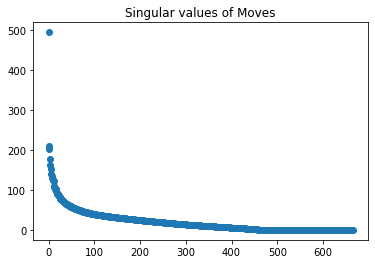

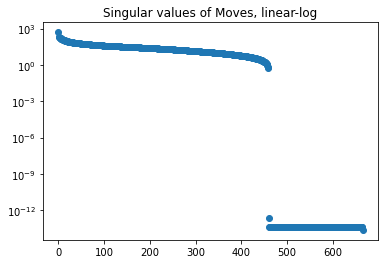

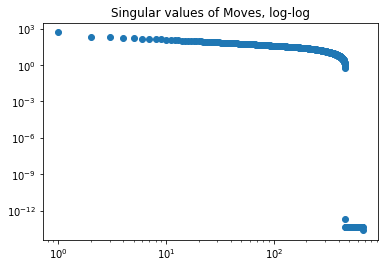

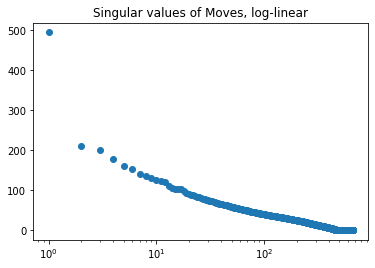

In [100]:
plt.scatter(range(len(ms)), ms)
plt.title('Singular values of Moves')
plt.show()

plt.scatter(range(len(ms)), ms)
plt.title('Singular values of Moves, linear-log')
plt.yscale('log')
plt.show()

plt.scatter(range(1,len(ms)+1), ms)
plt.title('Singular values of Moves, log-log')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.scatter(range(1,len(ms)+1), ms)
plt.title('Singular values of Moves, log-linear')
plt.xscale('log')
plt.show()

In [101]:
np.cumsum(ms**2)[:20] / (ms**2).sum()

array([0.24331287, 0.28712954, 0.32740905, 0.35876828, 0.38473366,
       0.40793562, 0.42722803, 0.44521628, 0.46207999, 0.477796  ,
       0.49312379, 0.5078058 , 0.52008268, 0.53136655, 0.54212608,
       0.55259547, 0.56286869, 0.57222048, 0.58081106, 0.5889425 ])

In [79]:
list(enumerate(fieldlist))

[(0, 'onDamagePriority'),
 (1, 'onTryHit'),
 (2, 'useSourceDefensiveAsOffensive'),
 (3, 'noMetronome'),
 (4, 'smartTarget'),
 (5, 'nonGhostTarget'),
 (6, 'tracksTarget'),
 (7, 'stealsBoosts'),
 (8, 'useTargetOffensive'),
 (9, 'pp: 20'),
 (10, 'pp: 15'),
 (11, 'pp: 10'),
 (12, 'pp: 5'),
 (13, 'pp: 35'),
 (14, 'pp: 40'),
 (15, 'pp: 25'),
 (16, 'pp: 30'),
 (17, 'ignoreImmunity: True'),
 (18, 'ignoreImmunity: False'),
 (19, 'ignoreImmunity: Ground; True'),
 (20, 'target: allyTeam'),
 (21, 'target: allies'),
 (22, 'target: self'),
 (23, 'target: adjacentAllyOrSelf'),
 (24, 'target: foeSide'),
 (25, 'target: allAdjacentFoes'),
 (26, 'target: randomNormal'),
 (27, 'target: adjacentAlly'),
 (28, 'target: all'),
 (29, 'target: allAdjacent'),
 (30, 'target: allySide'),
 (31, 'target: any'),
 (32, 'target: normal'),
 (33, 'target: scripted'),
 (34, 'priority: 0'),
 (35, 'priority: -5'),
 (36, 'priority: -3'),
 (37, 'priority: -1'),
 (38, 'priority: 4'),
 (39, 'priority: 1'),
 (40, 'priority: -6')

In [117]:
def decode_move(m):
    fs = sorted(enumerate(m[:len(fieldlist)]), key=lambda x: x[1])
    important_fields = fs[:5] + fs[-5:]
    
    typing = np.argmax(abs(m[70:88])) + 70
    print('Typing: ', fieldlist[typing], m[typing])
    categ = np.argmax(abs(m[345:348])) + 345
    print('Category: ', fieldlist[categ], m[categ])
    power = np.argmax( abs(m[260:291])) + 260
    print('Power: ', fieldlist[power], m[power])
    acc = np.argmax(abs(m[139:151])) + 139
    print('Accuracy: ', fieldlist[acc], m[acc])
    pp = np.argmax(abs(m[9:17]))+9
    print('PP: ', fieldlist[pp], m[pp])
    target = np.argmax(abs(m[20:34]))+20
    print('Target: ', fieldlist[target], m[target])
    priority = np.argmax(abs(m[34:46])) + 34
    print('Priority: ', fieldlist[priority], m[priority])
    vstatus = np.argmax(abs(m[93:133])) + 93
    print('Volatile effect: ', fieldlist[vstatus], m[vstatus])
    boost = np.argmax( abs(m[373:399])) + 373
    print('Boost: ', fieldlist[boost], m[boost])
    print('\nOther fields:')
    print(important_fields)
    for f in important_fields:
        print(fieldlist[f[0]],': ', f[1])
    
    

In [102]:
decode_move(movemean)

Typing:  type: Normal 0.22822822822822822
Category:  category: Physical 0.4039039039039039
Power:  basePower: 0 0.3768768768768769
Accuracy:  accuracy: 100 0.5195195195195195
PP:  pp: 10 0.33783783783783783
Target:  target: normal 0.6726726726726727
Priority:  priority: 0 0.933933933933934
Volatile effect:  volatileStatus: partiallytrapped 0.015015015015015015
Boost:  boosts: atk; 1 0.01951951951951952

Other fields:
target: normal :  0.6726726726726727
flags: protect; 1 :  0.7852852852852853
onDamagePriority :  0.0015015015015015015
onTryHit :  0.0015015015015015015
smartTarget :  0.0015015015015015015
secondary:  :  0.7627627627627628
priority: 0 :  0.933933933933934
flags: mirror; 1 :  0.7807807807807807
useSourceDefensiveAsOffensive :  0.0015015015015015015
noMetronome :  0.0015015015015015015


In [104]:
decode_move(mvt[0]*np.sqrt(ms[0])*movevar + movemean)

Typing:  type: Normal 0.2550806511208561
Category:  category: Status 0.42873667044781616
Power:  basePower: 0 0.4951261159987108
Accuracy:  accuracy: 100 0.4623822556193141
PP:  pp: 10 0.42953226228199076
Target:  target: normal 0.6135922758461981
Priority:  priority: 0 0.8907347231766438
Volatile effect:  volatileStatus: partiallytrapped 0.06913959335265527
Boost:  boosts: atk; 1 0.01250470994147996

Other fields:
target: normal :  0.6135922758461981
boosts: evasion; -2 :  0.00023898695586524097
boosts: def; -2 :  0.00023891937250932545
basePower: 45 :  -6.666940744950284e-05
priority: -1 :  9.571264815025847e-05
flags: protect; 1 :  0.6796893519544688
secondary: boosts; spd; -2 :  0.00024192893378597517
secondary:  :  0.9041549663463809
priority: 0 :  0.8907347231766438
flags: mirror; 1 :  0.6640417707387396


In [118]:
decode_move(mvt[0])

Typing:  type: Normal 0.005374533427431519
Category:  category: Status 0.009314118859298925
Power:  basePower: 0 0.03243964630042659
Accuracy:  accuracy: True 0.018089216125666188
PP:  pp: 10 0.013181302694822991
Target:  target: normal -0.013725274652787002
Priority:  priority: 0 -0.01887986039199587
Volatile effect:  volatileStatus: partiallytrapped 0.05340891983532981
Boost:  boosts: atk; -1 -0.004428222981273204

Other fields:
[(353, -0.021653685673693968), (364, -0.019586778643594753), (34, -0.01887986039199587), (331, -0.014052290919772042), (32, -0.013725274652787002), (194, 0.019333869133175755), (283, 0.03243964630042659), (223, 0.03339604385984169), (317, 0.043282308605523755), (93, 0.05340891983532981)]
flags: mirror; 1 :  -0.021653685673693968
flags: protect; 1 :  -0.019586778643594753
priority: 0 :  -0.01887986039199587
secondary: chance; 10 :  -0.014052290919772042
target: normal :  -0.013725274652787002
condition: noCopy; True :  0.019333869133175755
basePower: 0 :  0.03

In [112]:
cmoves = [ (i,move, mvt[0] @ movemat_pca[i]) for i,move in enumerate(movelist)]
scmoves = sorted(cmoves, key=lambda x: x[2])
print(scmoves[:5])
print(scmoves[-5:])

[(99, 'originpulse', -17.378040901464832), (409, 'precipiceblades', -17.319324240378364), (501, 'dragonclaw', -17.288414362926616), (176, 'branchpoke', -17.287423184663627), (402, 'xscissor', -17.285075121910374)]
[(586, 'fling', 60.59258794112944), (424, 'outrage', 69.32596230589961), (199, 'petaldance', 69.35933724620565), (196, 'thrash', 69.37036095619455), (158, 'substitute', 73.56668984886315)]


<BarContainer object of 1508 artists>

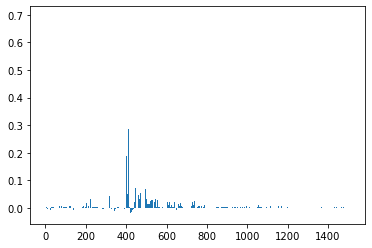

In [113]:
plt.bar(range(len(mvt[0])), mvt[0])
plt.show()

In [123]:
np.argsort(-mvt[0])[:5] - len(fieldlist)

array([ 0, 11, 14, 57,  1], dtype=int64)

In [125]:
for i in np.argsort(-mvt[0])[:5] - len(fieldlist):
    print(wordlist[i], '\t', mvt[0,i+len(fieldlist)])

the 	 0.6946590228135947
if 	 0.28593499795268423
is 	 0.2736000021045937
or 	 0.2670407254896723
user 	 0.18929662877610856


In [126]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [131]:
lda = LDA(10)
lda.fit(movemat[:,len(fieldlist):])

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [132]:
doc_topics = lda.transform(movemat[:,len(fieldlist):])
topic_words = lda.components_

In [133]:
print(movemat.shape)
print(doc_topics.shape)
print(topic_words.shape)

(666, 1508)
(666, 10)
(10, 1108)


In [135]:
# First the naive way of interpreting
for t,topic in enumerate(topic_words):
    print('Topic ', t)
    for j in np.argsort(-topic)[:10]:
        print('\t',wordlist[j],': ', topic[j])
    print('')

Topic  0
	 the :  380.9632246695151
	 or :  160.87950649243015
	 if :  154.50039580845385
	 is :  145.43351646094075
	 target :  117.11654501154352
	 user :  111.12106864802587
	 hp :  88.79045698271892
	 of :  74.67369691559895
	 rounded :  73.37724111888976
	 effect :  63.90223179844261

Topic  1
	 the :  136.68774313937251
	 is :  41.35491388862656
	 if :  38.16614264938041
	 effect :  35.46416296898159
	 user :  26.642660404597077
	 of :  24.12595104763609
	 for :  23.87672570233151
	 turns :  23.578080408269795
	 target :  23.391861554536344
	 and :  21.695308654350058

Topic  2
	 effect :  58.680358207161895
	 no :  57.74257293404921
	 additional :  52.099999999229034
	 use :  5.784125263727697
	 shield :  4.498254764734207
	 behemoth :  3.5710340490409664
	 paralyzes :  3.0999717874934447
	 thief :  3.0430788454274507
	 bash :  3.0430470762985364
	 trap :  2.829761455722997

Topic  3
	 the :  372.5969257863733
	 if :  109.8463727582189
	 hit :  106.1571243762001
	 and :  99.5528

In [136]:
normalized_topics = topic_words.copy()
normalized_topics = normalized_topics / np.mean(normalized_topics,0)

In [137]:
# Now the better way
for t,topic in enumerate(normalized_topics):
    print('Topic ', t)
    for j in np.argsort(-topic)[:10]:
        print('\t',wordlist[j],': ', topic[j])
    print('')

Topic  0
	 baton :  9.785700459778079
	 1/2 :  9.69998892565276
	 restores :  9.60182385310795
	 flip :  9.571425838282426
	 volt :  9.571425838282426
	 u-turn :  9.571425838282426
	 teleport :  9.571425838282426
	 parting :  9.571425838282426
	 shot :  9.571425838282426
	 shed :  9.526314482939986

Topic  1
	 spikes :  9.399975443244976
	 fall :  9.357133001253844
	 toxic :  8.874956194556548
	 web :  8.874956194417013
	 aurora :  8.714273305595334
	 reflect :  8.499983323236094
	 screen :  8.499983323236094
	 stealth :  8.19994094720449
	 light :  8.099986842395081
	 veil :  7.983764410195262

Topic  2
	 additional :  9.83018867909985
	 paralyzes :  7.7499294687350675
	 bash :  7.607617690746871
	 behemoth :  7.142068098082451
	 beam :  6.999999999956719
	 apple :  6.999999999956719
	 steam :  6.999999999956719
	 hyperspace :  6.999999999956719
	 abilitys :  6.999852116202303
	 iron :  6.999335550766518

Topic  3
	 times :  9.873233535929044
	 terrain :  9.799985320251576
	 breaks : 

In [139]:
# Now the better way
for t,topic in enumerate(normalized_topics):
    print('Topic ', t)
    for doc in np.argsort(-doc_topics[:,t])[:10]:
        print('\t', movelist[doc],': ', doc_topics[doc,t])
    print()

Topic  0
	 whirlpool :  0.991963151259827
	 snaptrap :  0.991963151259827
	 clamp :  0.991963151259827
	 sandtomb :  0.991963151259827
	 thundercage :  0.991963151259827
	 firespin :  0.991963151259827
	 bind :  0.991963151259827
	 magmastorm :  0.991963151259827
	 infestation :  0.991963151259827
	 wrap :  0.991963151259827

Topic  1
	 yawn :  0.989283140533154
	 safeguard :  0.9869544644538164
	 mindreader :  0.9816286304229511
	 lockon :  0.9816286304229511
	 courtchange :  0.9804319361666418
	 rest :  0.8327029371059192
	 facade :  0.8064760176177079
	 willowisp :  0.7749546917245579
	 brickbreak :  0.6287821297608606
	 psychicfangs :  0.6287821297608606

Topic  2
	 metronome :  0.9953117490619078
	 vinewhip :  0.774997309993121
	 watergun :  0.774997309993121
	 highhorsepower :  0.774997309993121
	 vacuumwave :  0.774997309993121
	 shadowsneak :  0.774997309993121
	 astralbarrage :  0.774997309993121
	 petalblizzard :  0.774997309993121
	 pound :  0.774997309993121
	 brutalswing :

In [ ]:
# The idea would be, what is the true number of times a word has shown up in a document?